# Manipulating VTK files with Paraview
This IPython notebook investigates the loading and manipulating of VTK files through use of the Paraview Python libraries.

## Loading Paraview libraries
Paraview provides a Python shell **pvpython** which is setup with the necessary include paths to enable the use of the libraries. Through investigation of load orders and module load paths, the below was determined as the required approach to utilise the Paraview libraries in IPython.

In [1]:
import sys
sys.path = ["C:/Program Files/ParaView 4.4.0/lib/paraview-4.4/site-packages/",
            "C:/Program Files/ParaView 4.4.0/lib/paraview-4.4/site-packages/vtk"
           ] + sys.path
import os
os.environ['PATH'] = "C:\\Program Files\\ParaView 4.4.0\\bin;" + os.environ['PATH']
import paraview.simple

paraview version 4.4.0


## Loading VTK files
The provided VTK files were presented as a set of partial meshes, the filenames were not intuitively related to their contents. Paraview GUI was used to interactively examine the files to find some suitable for beginning basic visualisation and manipulation investigations. An aerofoil shape was found in the file **n0012_897_a0p0_4_0.pvtp**:

In [2]:
vtkData = paraview.simple.OpenDataFile('../samples/CFD/n0012_897_a0p0_P12_OUTPUT/n0012_897_a0p0_4_0.pvtp')

Put the camera somewhere interesting and save a screenshot:

In [3]:
paraview.simple.Show(vtkData)
cam = paraview.simple.GetActiveCamera()
cam.SetPosition(1.4721964184224252, -2.279991281731778, 0.4211363870288759)
paraview.simple.Render();
paraview.simple.SaveScreenshot('NACA0012.png');

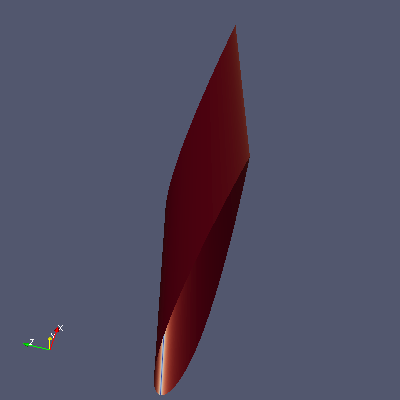

In [4]:
from IPython.display import Image
Image(filename='NACA0012.png')

## Slicing the object
In order to compare planar LIDAR data with 3-d CFD output, a slice plane is required to extract the same data.

In [5]:
slicer = paraview.simple.Slice()
slicer.Input = vtkData
slicer.Crinkleslice = False
slicer.SliceType.Origin = [0,0,0]
slicer.SliceType.Normal = [0,1,1]

Hide the previous object and show the slice just generated:

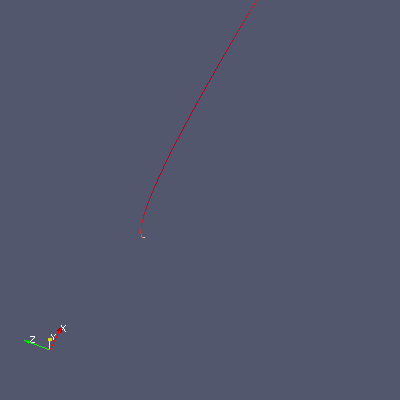

In [14]:
paraview.simple.Hide(vtkData)
paraview.simple.Show(slicer)
cam = paraview.simple.GetActiveCamera()
cam.SetPosition(1.4721964184224252, -2.279991281731778, 0.4211363870288759)
paraview.simple.Render()
paraview.simple.SaveScreenshot('NACA0012-sliced.png');

from IPython.display import Image
Image(filename='NACA0012-sliced.png')

## Export of data from the slice
Data from the slice needs to be exported into a format usable in other tools. CSV is a reasonable choice:

In [13]:
writer = paraview.simple.CreateWriter('out.csv',slicer)
writer.FieldAssociation = "Cells"
writer.UpdatePipeline()
with open('out.csv','r') as fh:
    l = 0
    while l < 10:
        
        print fh.readline()
        l += 1
        

"zone","V:0","V:1","V:2","p","T","rho","mach","cp","cf:0","cf:1","cf:2","pressureforce:0","pressureforce:1","pressureforce:2","pressuremoment:0","pressuremoment:1","pressuremoment:2","frictionforce:0","frictionforce:1","frictionforce:2","frictionmoment:0","frictionmoment:1","frictionmoment:2","eddy","yplus","var_6","var_7","Cell Type"

4,0,0,0,1.0168e+005,301.22,1.1762,0,0.22466,0.0012245,-2.6052e-018,-0.00017349,-3.1798e-005,0,-0.00022444,0.00011222,0.00022432,-1.5899e-005,1.2355e-006,-2.6286e-021,-1.7505e-007,6.1716e-010,-2.6247e-024,1.2388e-011,0,0.061486,0,1.4372e+008,3

4,0,0,0,1.0169e+005,301.23,1.1763,0,0.23061,0.00090348,-2.6771e-018,-0.00012794,-3.3805e-005,0,-0.00023872,0.00011936,0.00023835,-1.6902e-005,9.4458e-007,-2.7988e-021,-1.3376e-007,4.889e-010,-2.8928e-024,9.8038e-012,0,0.052821,0,1.4369e+008,3

4,0,0,0,1.0168e+005,301.22,1.1762,0,0.22461,0.001225,2.1667e-018,0.00017368,-3.1815e-005,0,0.00022439,-0.00011219,-0.00022427,-1.5907e-005,1.236e-006,2.1861e-021,1.7525e-007,